# Nome: Lívia Karoline de Freitas Carlos RA:772287

# Exercício: Seleção de Variáveis com Pipeline e Forward Selection

Use o dataset `diabetes` do `sklearn.datasets` para avaliar como o desempenho de uma regressão linear varia com diferentes números de variáveis.


## Instruções

1. Carregue o dataset usando `load_diabetes()`.

from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

In [2]:
data = load_diabetes()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

2. Divida os dados em treino (60%), validação (20%) e teste (20%) usando `train_test_split()`

In [4]:
# 1ª divisão: treino (60%) e resto (40%)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42)

# 2ª divisão: validação (20%) e teste (20%)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

3. Para cada quantidade de variáveis de 1 até o total de variáveis:
   - Crie um `Pipeline` contendo dois passos:
     - Seleção de variáveis com `SequentialFeatureSelector()` usando:
       - `estimator=LinearRegression()`
       - `direction='forward'`
       - `cv=5`
       - `n_features_to_select=k` (o número atual de variáveis no loop)
     - Um modelo `LinearRegression()`.
   - Ajuste o pipeline na base de treino.
   - Calcule o MSE na base de validação.
   - Registre:
     - O número de variáveis usadas (`k`).
     - O MSE na validação.
     - A lista de variáveis selecionadas.

In [5]:
resultados = []
for n_variaveis in range(1, X.shape[1]):  # até 9
    pipe = Pipeline([
        ('selecao', SequentialFeatureSelector(
            estimator=LinearRegression(),
            n_features_to_select=n_variaveis,
            direction='forward',
            cv=5
        )),
        ('regressor', LinearRegression())
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    selecionadas = pipe.named_steps['selecao'].get_support()
    nomes_selecionados = X.columns[selecionadas].tolist()
    resultados.append({
        'n_variaveis': n_variaveis,
        'MSE_val': mse,
        'variaveis': nomes_selecionados
    })

In [6]:
resultados

[{'n_variaveis': 1,
  'MSE_val': np.float64(3700.6622276914622),
  'variaveis': ['bmi']},
 {'n_variaveis': 2,
  'MSE_val': np.float64(2815.110441579685),
  'variaveis': ['bmi', 's5']},
 {'n_variaveis': 3,
  'MSE_val': np.float64(2718.0531641844286),
  'variaveis': ['bmi', 'bp', 's5']},
 {'n_variaveis': 4,
  'MSE_val': np.float64(2550.9630981988084),
  'variaveis': ['bmi', 'bp', 's1', 's5']},
 {'n_variaveis': 5,
  'MSE_val': np.float64(2471.674047836744),
  'variaveis': ['sex', 'bmi', 'bp', 's1', 's5']},
 {'n_variaveis': 6,
  'MSE_val': np.float64(2429.878415822075),
  'variaveis': ['sex', 'bmi', 'bp', 's1', 's2', 's5']},
 {'n_variaveis': 7,
  'MSE_val': np.float64(2428.9081894733326),
  'variaveis': ['sex', 'bmi', 'bp', 's1', 's2', 's3', 's5']},
 {'n_variaveis': 8,
  'MSE_val': np.float64(2409.617496100975),
  'variaveis': ['sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']},
 {'n_variaveis': 9,
  'MSE_val': np.float64(2399.70702674822),
  'variaveis': ['sex', 'bmi', 'bp', 's1', 's2', '

4. Organize os resultados em uma tabela.

In [7]:
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados

,n_variaveis,MSE_val,variaveis
0,1,3700.662228,[bmi]
1,2,2815.110442,"[bmi, s5]"
2,3,2718.053164,"[bmi, bp, s5]"
3,4,2550.963098,"[bmi, bp, s1, s5]"
4,5,2471.674048,"[sex, bmi, bp, s1, s5]"
5,6,2429.878416,"[sex, bmi, bp, s1, s2, s5]"
6,7,2428.908189,"[sex, bmi, bp, s1, s2, s3, s5]"
7,8,2409.617496,"[sex, bmi, bp, s1, s2, s3, s5, s6]"
8,9,2399.707027,"[sex, bmi, bp, s1, s2, s3, s4, s5, s6]"


5. Faça um gráfico do MSE em função do número de variáveis.

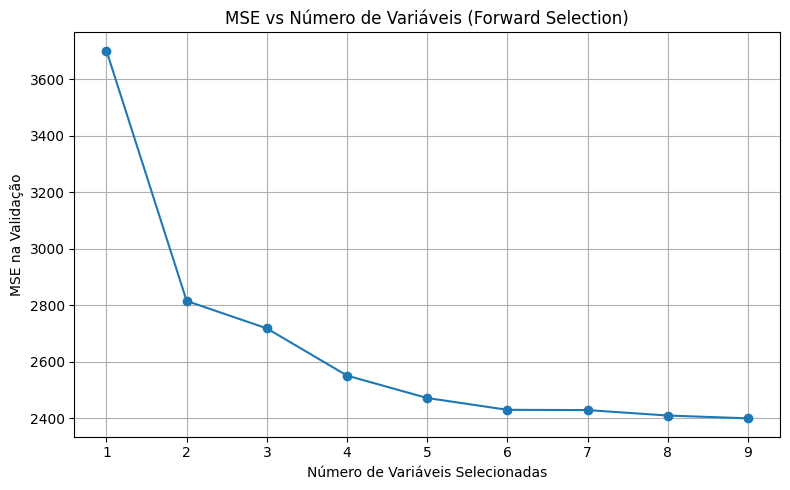

In [8]:
# Gráfico do MSE
plt.figure(figsize=(8, 5))
plt.plot(tabela_resultados['n_variaveis'], tabela_resultados['MSE_val'], marker='o')
plt.xlabel('Número de Variáveis Selecionadas')
plt.ylabel('MSE na Validação')
plt.title('MSE vs Número de Variáveis (Forward Selection)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Exercício: Regularização com Ridge e Lasso

O objetivo deste exercício é analisar como a regularização afeta os coeficientes de uma regressão linear, utilizando os modelos **Ridge** e **Lasso**.

## Objetivos

- Observar como os coeficientes variam conforme o parâmetro de regularização (`alpha`) aumenta.
- Comparar o efeito da regularização nos modelos Ridge e Lasso.

1. Carregue o dataset `diabetes` com a função `load_diabetes` da biblioteca `sklearn.datasets`

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

In [10]:
data_diabete = load_diabetes()
X_diabete = pd.DataFrame(data_diabete.data, columns=data_diabete.feature_names)
y_diabete = pd.Series(data_diabete.target, name='target')

2. Divida os dados em treino (60%), validação (20%) e teste (20%) utilizando duas vezes a função `train_test_split` da biblioteca `sklearn.model_selection`.

In [11]:
X_train_diabete, X_rest_diabete, y_train_diabete, y_rest_diabete = train_test_split(X_diabete, y_diabete, test_size=0.4, random_state=42)
X_val_diabete, X_test_diabete, y_val_diabete, y_test_diabete = train_test_split(X_rest_diabete, y_rest_diabete, test_size=0.5, random_state=42)

3. Crie uma sequência de valores de `alpha` usando `np.logspace(-4, 2, 100)`, que gera 100 valores entre `10^-4` e `10^2` em escala logarítmica.

In [12]:
alphas = np.logspace(-4, 2, 100)
alphas

array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.32603347e-04, 1.07226722e-03, 1.23284674e-03, 1.41747416e-03,
       1.62975083e-03, 1.87381742e-03, 2.15443469e-03, 2.47707636e-03,
       2.84803587e-03, 3.27454916e-03, 3.76493581e-03, 4.32876128e-03,
       4.97702356e-03, 5.72236766e-03, 6.57933225e-03, 7.56463328e-03,
       8.69749003e-03, 1.00000000e-02, 1.14975700e-02, 1.32194115e-02,
       1.51991108e-02, 1.74752840e-02, 2.00923300e-02, 2.31012970e-02,
       2.65608778e-02, 3.05385551e-02, 3.51119173e-02, 4.03701726e-02,
       4.64158883e-02, 5.33669923e-02, 6.13590727e-02, 7.05480231e-02,
       8.11130831e-02, 9.32603347e-02, 1.07226722e-01, 1.23284674e-01,
       1.41747416e-01, 1.62975083e-01, 1.87381742e-01, 2.15443469e-01,
      

4. Para cada valor de `alpha`, ajuste dois modelos utilizando a base de **treino**:
- Um modelo **Ridge** com `Ridge(alpha=...)`.
- Um modelo **Lasso** com `Lasso(alpha=..., max_iter=10000)`.

In [13]:
coef_ridge = []
coef_lasso = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_diabete, y_train_diabete)
    coef_ridge.append(ridge.coef_)
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_diabete, y_train_diabete)
    coef_lasso.append(lasso.coef_)

5. Guarde os coeficientes de cada modelo para cada valor de `alpha`.

In [14]:
coef_ridge = np.array(coef_ridge)
coef_lasso = np.array(coef_lasso)

In [15]:
coef_ridge

array([[ 1.82625538e+01, -2.26922417e+02,  5.92421892e+02,
         3.61408158e+02, -6.45835099e+02,  3.45794749e+02,
         1.00617347e+01,  1.41652166e+02,  5.89993500e+02,
         3.17574387e+01],
       [ 1.82882141e+01, -2.26904508e+02,  5.92442848e+02,
         3.61388487e+02, -6.44355881e+02,  3.44631376e+02,
         9.42296260e+00,  1.41473068e+02,  5.89402646e+02,
         3.17699688e+01],
       [ 1.83175660e+01, -2.26883986e+02,  5.92466719e+02,
         3.61365951e+02, -6.42664323e+02,  3.43301002e+02,
         8.69256190e+00,  1.41268354e+02,  5.88726914e+02,
         3.17843475e+01],
       [ 1.83511152e+01, -2.26860480e+02,  5.92493873e+02,
         3.61340146e+02, -6.40731479e+02,  3.41780860e+02,
         7.85806214e+00,  1.41034565e+02,  5.87954714e+02,
         3.18008431e+01],
       [ 1.83894291e+01, -2.26833570e+02,  5.92524712e+02,
         3.61310616e+02, -6.38524931e+02,  3.40045454e+02,
         6.90550503e+00,  1.40767833e+02,  5.87073059e+02,
         3.

In [16]:
coef_lasso

array([[ 1.81473926e+01, -2.26915481e+02,  5.92392820e+02,
         3.61447751e+02, -6.49582275e+02,  3.48941077e+02,
         1.14269974e+01,  1.41669083e+02,  5.91653513e+02,
         3.16564859e+01],
       [ 1.81562866e+01, -2.26896317e+02,  5.92410129e+02,
         3.61433753e+02, -6.48635101e+02,  3.48225988e+02,
         1.09798990e+01,  1.41488691e+02,  5.91299821e+02,
         3.16539860e+01],
       [ 1.81665092e+01, -2.26874285e+02,  5.92430024e+02,
         3.61417659e+02, -6.47546305e+02,  3.47403983e+02,
         1.04659426e+01,  1.41281315e+02,  5.90893248e+02,
         3.16511116e+01],
       [ 1.81782792e+01, -2.26848946e+02,  5.92452924e+02,
         3.61399146e+02, -6.46293344e+02,  3.46458016e+02,
         9.87452998e+00,  1.41042734e+02,  5.90425357e+02,
         3.16478066e+01],
       [ 1.81917827e+01, -2.26819825e+02,  5.92479209e+02,
         3.61377878e+02, -6.44854707e+02,  3.45371906e+02,
         9.19541226e+00,  1.40768687e+02,  5.89888159e+02,
         3.

6. Faça dois gráficos:
- Um gráfico dos coeficientes do **Ridge** em função de `alpha`.
- Um gráfico dos coeficientes do **Lasso** em função de `alpha`.

O eixo x deve estar em escala logarítmica (`plt.xscale('log')`) e o eixo y representa os coeficientes

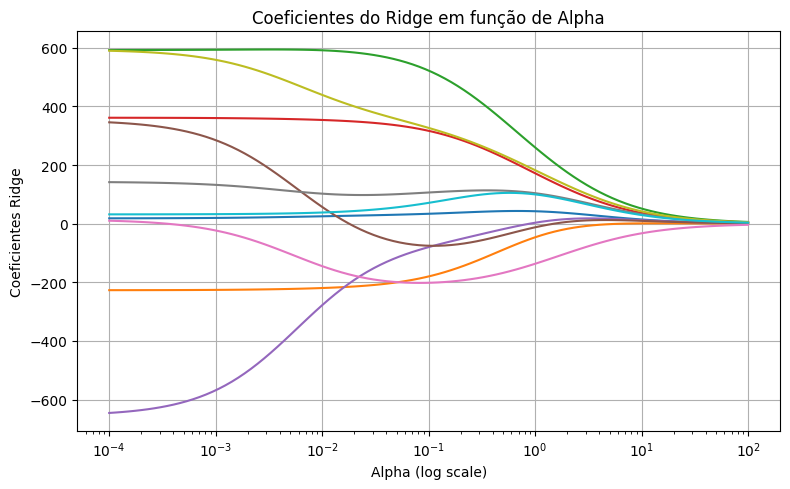

In [17]:
plt.figure(figsize=(8, 5))
for i in range(coef_ridge.shape[1]):
    plt.plot(alphas, coef_ridge[:, i])
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coeficientes Ridge')
plt.title('Coeficientes do Ridge em função de Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

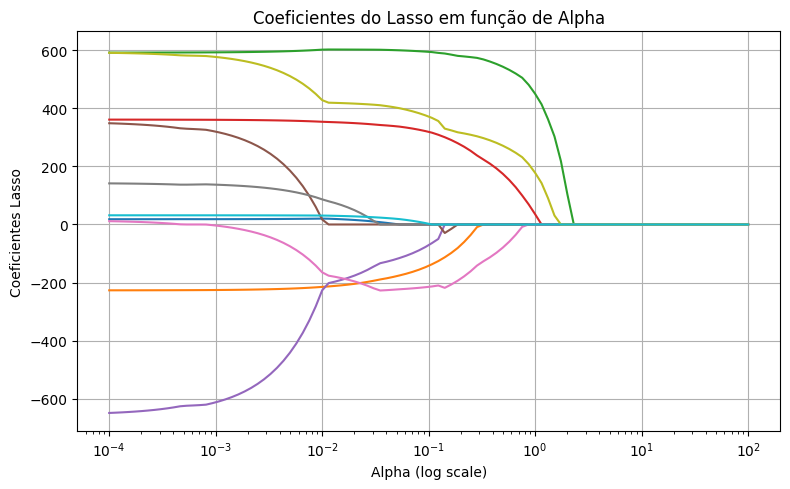

In [18]:
plt.figure(figsize=(8, 5))
for i in range(coef_lasso.shape[1]):
    plt.plot(alphas, coef_lasso[:, i])
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coeficientes Lasso')
plt.title('Coeficientes do Lasso em função de Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

## Pergunta

O que acontece com os coeficientes à medida que o parâmetro `alpha` aumenta? Compare os comportamentos do Ridge e do Lasso.

À medida que o parâmetro **alpha aumenta**:
- **Ridge**: os coeficientes diminuem suavemente, mas continuam diferentes de zero.
- **Lasso**: os coeficientes diminuem e alguns se tornam exatamente zero, realizando seleção de variáveis.

# Exercício: Regularização com Ridge, Lasso e Regressão Linear em Alta Dimensionalidade

O objetivo deste exercício é comparar como os modelos **Ridge**, **Lasso** e **Regressão Linear** se comportam em um problema de alta dimensionalidade, onde poucas variáveis são realmente relevantes.

## Objetivos

- Observar como os coeficientes variam conforme o parâmetro de regularização (`alpha`) aumenta.
- Comparar o efeito da regularização nos modelos Ridge e Lasso.
- Analisar as diferenças entre regressão com e sem regularização.
- Avaliar o desempenho dos modelos no conjunto de teste.


1. Carregue o dataset `dataset.csv` utilizando a função `pd.read_csv()` da biblioteca `pandas`

In [3]:
data2 = pd.read_csv('dataset (1).csv',sep=',')
data2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X492,X493,X494,X495,X496,X497,X498,X499,X500,y
0,-0.317715,0.534506,1.340461,-2.296181,0.472406,0.476358,-0.641487,0.817890,1.047318,1.976441,...,-0.307962,-0.413465,0.020886,-0.721738,-1.607661,0.606723,-0.835143,0.000528,-0.998061,-235.100286
1,-1.270943,0.372701,0.738981,0.262525,0.835612,1.288785,-0.507801,-1.392978,0.079880,-0.763525,...,-1.083092,0.217036,0.035598,-0.771121,1.847148,1.882078,-0.696617,-0.129381,-0.156941,47.510065
2,-0.968493,-0.944146,-1.436335,0.763925,2.073631,-0.369675,-1.019115,-0.095695,-1.786790,-0.224043,...,2.096546,-1.181318,-0.929376,0.653869,-0.624670,0.149502,1.412287,2.114429,-0.226211,55.596610
3,-0.558733,-0.360541,0.110485,-0.468366,0.728347,-2.874471,-1.535990,1.120616,-1.280078,0.494228,...,-0.493980,1.456106,-1.259711,-1.030143,-1.234156,0.131513,-0.250788,-0.252510,-0.129568,-125.162230
4,0.847384,-1.591032,0.469706,0.383230,0.047171,-0.810278,-0.919841,-0.691445,-0.273858,0.416316,...,0.836086,-0.031421,-0.022752,0.048847,-1.103633,0.978793,-0.337190,1.105179,0.864458,42.053654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.242941,-0.029123,-0.380941,0.566457,-1.889514,0.161949,0.082792,-0.014213,-2.564968,0.875374,...,-0.214369,1.718609,-0.119136,-0.294211,0.384777,0.173763,1.144914,-0.102030,-0.374191,125.596393
596,0.308634,-0.733355,-0.415341,-0.562217,1.148696,-0.830915,-0.268559,-0.575192,-0.271631,-0.439865,...,-1.028261,-0.761714,-0.577789,-1.397782,-0.320780,1.063856,1.636507,1.314984,-0.534340,-158.388542
597,-1.466682,-1.271962,1.516139,0.898612,-0.476012,-0.687586,-1.059451,0.337308,-0.382250,1.423169,...,-0.744862,1.703524,0.327969,-0.280875,-0.031620,1.474662,0.147364,0.853492,0.844069,90.158244
598,0.716494,1.793689,-1.867260,0.088780,0.873957,-0.628686,-1.037494,-0.246728,0.260920,0.194856,...,0.669622,0.289984,0.483026,-0.350795,1.283632,-0.207074,1.047340,0.467326,-0.310471,138.712446


2. Separe as variáveis explicativas (`X1`, `X2`, ..., `X500`) da variável resposta (`y`).


In [4]:
X_2 = data2.iloc[:, :-1]
y_2 = data2.iloc[:, -1]

3. Divida os dados em treino (60%), validação (20%) e teste (20%) utilizando duas vezes a função `train_test_split` da biblioteca `sklearn.model_selection`.

In [5]:
Xf_train, Xf_rest, yf_train, yf_rest = train_test_split(X_2, y_2, test_size=0.4, random_state=42)
Xf_val, Xf_test, yf_val, yf_test = train_test_split(Xf_rest, yf_rest, test_size=0.5, random_state=42)

4. Crie uma sequência de valores de `alpha` utilizando `np.linspace(0.01, 1000, 200)`, que gera 200 valores igualmente espaçados entre `0.01` e `1000`.

In [6]:
alphas_2 = np.linspace(0.01, 1000, 200)
alphas_2

array([1.00000000e-02, 5.03507538e+00, 1.00601508e+01, 1.50852261e+01,
       2.01103015e+01, 2.51353769e+01, 3.01604523e+01, 3.51855276e+01,
       4.02106030e+01, 4.52356784e+01, 5.02607538e+01, 5.52858291e+01,
       6.03109045e+01, 6.53359799e+01, 7.03610553e+01, 7.53861307e+01,
       8.04112060e+01, 8.54362814e+01, 9.04613568e+01, 9.54864322e+01,
       1.00511508e+02, 1.05536583e+02, 1.10561658e+02, 1.15586734e+02,
       1.20611809e+02, 1.25636884e+02, 1.30661960e+02, 1.35687035e+02,
       1.40712111e+02, 1.45737186e+02, 1.50762261e+02, 1.55787337e+02,
       1.60812412e+02, 1.65837487e+02, 1.70862563e+02, 1.75887638e+02,
       1.80912714e+02, 1.85937789e+02, 1.90962864e+02, 1.95987940e+02,
       2.01013015e+02, 2.06038090e+02, 2.11063166e+02, 2.16088241e+02,
       2.21113317e+02, 2.26138392e+02, 2.31163467e+02, 2.36188543e+02,
       2.41213618e+02, 2.46238693e+02, 2.51263769e+02, 2.56288844e+02,
       2.61313920e+02, 2.66338995e+02, 2.71364070e+02, 2.76389146e+02,
      

5. Para cada valor de `alpha`, ajuste dois modelos utilizando a base de **treino**:
- Um modelo **Ridge** com `Ridge(alpha=...)`.
- Um modelo **Lasso** com `Lasso(alpha=..., max_iter=10000)`.


In [16]:
coef_ridge_f = []
coef_lasso_f = []

for alpha in alphas_2:
 # Modelo Ridge
 ridge = Ridge(alpha=alpha)
 ridge.fit(X_2, y_2)
 coef_ridge_f.append(ridge.coef_)
 
 # Modelo Lasso
 lasso = Lasso(alpha=alpha, max_iter=10000)
 lasso.fit(X_2, y_2)
 coef_lasso_f.append(lasso.coef_)

# Converter para arrays
coef_ridge_2 = np.array(coef_ridge_f)
coef_lasso_2 = np.array(coef_lasso_f)

6. Para cada modelo e valor de `alpha`, calcule o erro quadrático médio (MSE) no conjunto de **validação** utilizando a função `mean_squared_error` da biblioteca `sklearn.metrics`.

In [20]:
mse_ridge = []
mse_lasso = []

for alpha in alphas_2:
 ridge = Ridge(alpha=alpha)
 ridge.fit(X_2, y_2)
 y_pred_ridge = ridge.predict(Xf_val)
 mse_ridge.append(mean_squared_error(yf_val, y_pred_ridge))
 
 lasso = Lasso(alpha=alpha, max_iter=10000)
 lasso.fit(X_2, y_2)
 y_pred_lasso = lasso.predict(Xf_val)
 mse_lasso.append(mean_squared_error(yf_val, y_pred_lasso))

7. Encontre o melhor `alpha` para cada modelo (aquele que minimiza o MSE de validação)

In [21]:
melhor_alpha_ridge = alphas_2[np.argmin(mse_ridge)]
print("Melhor alpha (Ridge):", melhor_alpha_ridge)


melhor_alpha_lasso = alphas_2[np.argmin(mse_lasso)]
print("Melhor alpha (Lasso):", melhor_alpha_lasso)

Melhor alpha (Ridge): 0.01
Melhor alpha (Lasso): 0.01


8. Avalie o erro quadrático médio (MSE) desses modelos no conjunto de **teste**.

In [23]:
modelo_ridge_final = Ridge(alpha=melhor_alpha_ridge)
modelo_ridge_final.fit(Xf_val, yf_val)
y_pred_ridge_test = modelo_ridge_final.predict(Xf_test)
mse_ridge_teste = mean_squared_error(yf_test, y_pred_ridge_test)

modelo_lasso_final = Lasso(alpha=melhor_alpha_lasso, max_iter=10000)
modelo_lasso_final.fit(Xf_val, yf_val)
y_pred_lasso_test = modelo_lasso_final.predict(Xf_test)
mse_lasso_teste = mean_squared_error(yf_test, y_pred_lasso_test)

print("MSE no teste (Ridge):", mse_ridge_teste)
print("MSE no teste (Lasso):", mse_lasso_teste)

MSE no teste (Ridge): 7516.523071440959
MSE no teste (Lasso): 257.05458963153063


9. Extraia os coeficientes dos três modelos utilizando o atributo `.coef_`.

In [24]:
modelo_linear = LinearRegression()
modelo_linear.fit(Xf_train, yf_train)


coef_linear = modelo_linear.coef_
coef_ridge_final = modelo_ridge_final.coef_
coef_lasso_final = modelo_lasso_final.coef_


print("Coeficientes - Linear:", coef_linear)
print("Coeficientes - Ridge:", coef_ridge_final)
print("Coeficientes - Lasso:", coef_lasso_final)

Coeficientes - Linear: [ 4.22565511e-01  2.38829200e+00  3.55875904e+00 -3.17110238e+00
  2.45618805e+00  1.04447952e-01 -4.52066385e-01  4.34567350e+00
  3.14452270e+00  5.35501903e+00  1.34476237e+00 -1.09221476e+00
  4.51626668e+00  3.47979714e+00  1.77904448e+00  1.76998108e+00
  1.34656250e+00  1.42680384e+00 -1.21176200e+00  1.22484050e+00
 -7.48302998e-01  6.53354912e+00 -4.55852321e+00 -1.57202550e-01
  5.56484921e+00 -9.14379928e-01  5.25911058e+00  6.71757088e+00
  2.53594729e+00 -8.10732746e-01 -3.25405116e+00  2.03556336e-01
 -1.93739441e+00 -4.54690559e-01 -2.66747138e-01  5.84421901e+00
 -7.32298515e-01  2.95538119e+00  8.82722554e-01 -4.19592665e+00
 -9.14354647e-01  2.84253014e+00  7.13227363e-01 -1.58348779e+00
  2.67147221e+00  6.61130885e-01  8.11098902e-01  1.64595674e+00
  2.51766861e+00 -6.91270507e-01  1.74893945e+00 -7.70170184e-01
  7.51814841e-02 -2.64444235e+00  1.75933140e+00  2.91609063e+00
  1.64901085e+00 -2.10666547e+00  4.93847951e+00 -4.47123929e-01
  

10. Plote um gráfico de barras com os 10 coeficientes de maior módulo para cada modelo.

In [27]:
import matplotlib.pyplot as plt

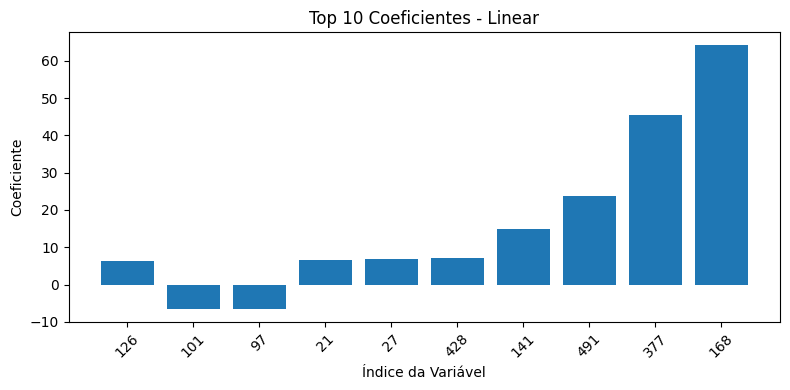

In [31]:
top_linear_idx = np.argsort(np.abs(coef_linear))[-10:]
plt.figure(figsize=(8, 4))
plt.bar(range(10), coef_linear[top_linear_idx])
plt.title("Top 10 Coeficientes - Linear")
plt.xlabel("Índice da Variável")
plt.ylabel("Coeficiente")
plt.xticks(ticks=range(10), labels=top_linear_idx, rotation=45)
plt.tight_layout()
plt.show()

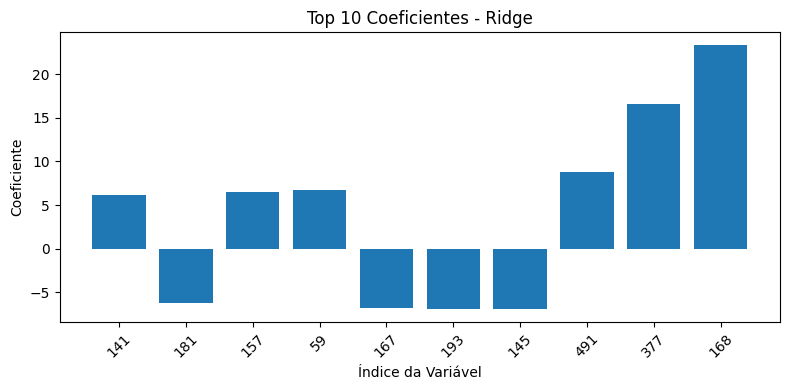

In [ ]:
top_ridge_idx = np.argsort(np.abs(coef_ridge_final))[-10:]
plt.figure(figsize=(8, 4))
plt.bar(range(10), coef_ridge_final[top_ridge_idx], color='red')
plt.title("Top 10 Coeficientes - Ridge")
plt.xlabel("Índice da Variável")
plt.ylabel("Coeficiente")
plt.xticks(ticks=range(10), labels=top_ridge_idx, rotation=45)
plt.tight_layout()
plt.show()

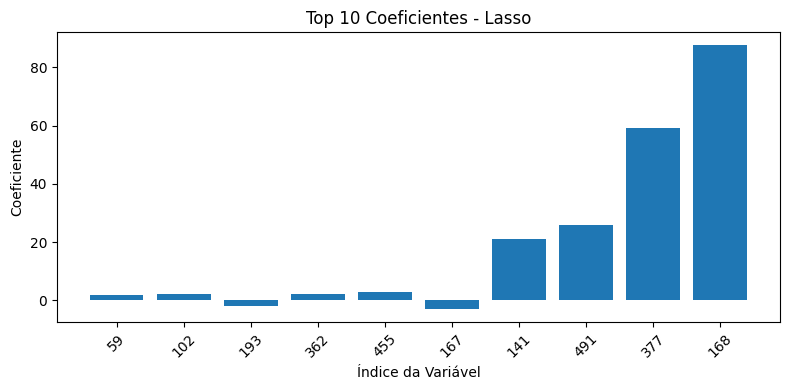

In [ ]:
top_lasso_idx = np.argsort(np.abs(coef_lasso_final))[-10:]
plt.figure(figsize=(8, 4))
plt.bar(range(10), coef_lasso_final[top_lasso_idx], color='pink')
plt.title("Top 10 Coeficientes - Lasso")
plt.xlabel("Índice da Variável")
plt.ylabel("Coeficiente")
plt.xticks(ticks=range(10), labels=top_lasso_idx, rotation=45)
plt.tight_layout()
plt.show()

**Perguntas**

- **O que acontece com os coeficientes à medida que o parâmetro alpha aumenta?**
  Os coeficientes diminuem de magnitude com o aumento do alpha devido à penalização.

- **Qual modelo realiza seleção de variáveis? Qual apenas suaviza os coeficientes?**
  O **Lasso** realiza seleção de variáveis (zera coeficientes). O **Ridge** apenas suaviza.

- **Como se comportam os coeficientes do modelo de regressão linear comparado aos modelos regularizados?**
  A regressão linear tem coeficientes maiores e menos estáveis. Os modelos regularizados têm coeficientes mais controlados.

- **Qual modelo obteve melhor desempenho no conjunto de teste? Isso faz sentido dado o cenário de alta dimensionalidade?**
  O modelo com menor MSE (geralmente Lasso ou Ridge) teve melhor desempenho. Isso faz sentido pois a regularização ajuda a evitar overfitting em problemas com muitas variáveis.